In the present notebook we analyse if synthetic accessibility scores can discriminate internal and not solved nodes with common parent or connected with edge.

In [1]:
%load_ext autoreload
%autoreload 2
from typing import Callable
from main.tree import Tree, TreeTypes
from main.score import Score
from main.stats import (
    histogram_pairs_siblings,
    histogram_pairs_parent_child,
    scatter_pairs,
    boxplot_scores,
    display_str,
    input_data,
    get_siblings_data,
    get_parent_child_data
)
from main.utils import fn_txt

from scipy.stats import ttest_1samp
import tabulate

detailed = False

def f(x: list[TreeTypes], y: list[TreeTypes], fn: Callable[[Tree], list[Score]]): return x, y, fn

def expandable_mols(tree: Tree): return [smiles.score for smiles in tree.expandable]
def all_mols(tree: Tree): return [smiles.score for smiles in (tree.expandable + tree.in_stock)]

SIBLINGS = 0
PARENTAL = 1

name_mapping = {"sa": "SAscore", "sc": "SCScore", "ra": "RAscore", "syba": "SYBA"}

## Analysis for siblings nodes

In [2]:
analyzed_pairs = SIBLINGS
    
analyzed_types = [
    (["internal"], ["not_solved"], all_mols),
    (["solved"], ["not_solved"], all_mols),
    (["internal"], ["not_solved"], expandable_mols)
]
data = get_siblings_data(analyzed_types, detailed)

In [3]:
title = False
rows = [[]]

print("Table of p-values of t-test for siblings pairs score difference if greater than 0.")

# P-values of t-test for alternative hypothesis that mean is grater than 0.
for i, (score_name, one_picture_data) in enumerate(data.items()):
    # Iterate over min, max, avg
    if score_name != "ai": # ai is value of internal AiZynthFinder score
        for _, (agg_name, single_panel_data) in enumerate(one_picture_data):
            row = [" ".join((name_mapping[score_name], agg_name))]
            for panel_id, (pair_typename, one_type_pairs) in enumerate(zip(analyzed_types, single_panel_data)):
                if not title:
                    rows[0].append(", ".join(pair_typename[0]) + " - " + ", ".join(pair_typename[1]) + " " + fn_txt(analyzed_types[panel_id][2]))
                test_result = ttest_1samp(one_type_pairs, 0, alternative="greater")
                row.append(test_result.pvalue)
            title = True
            rows.append(row)

tabulate.tabulate(rows, headers="firstrow",tablefmt='html')

Table of p-values of t-test for siblings pairs score difference if greater than 0.


,internal - not_solved all_mols,solved - not_solved all_mols,internal - not_solved expandable_mols
SAscore min,9.4852e-117,5.73736e-203,8.74547e-129
SAscore max,4.33469e-28,2.35845e-151,8.87905e-77
SAscore avg,1.14907e-131,1.68693e-287,5.37531e-149
SCScore min,4.17121e-14,1.16498e-61,6.12128e-05
SCScore max,1,1,1
SCScore avg,0.991196,0.96898,0.99951
RAscore min,0.000257693,0.00126648,0.000164594
RAscore max,0.00477493,0.00400366,0.0138089
RAscore avg,0.00108668,0.00233194,0.00175208
SYBA min,3.763e-30,2.37826e-06,1.2821e-39


## Parent - child analysis

In [4]:
analyzed_pairs = PARENTAL
    
analyzed_types = [
    (["internal"], ["not_solved"], all_mols),
    (["internal"], ["not_solved"], expandable_mols)
]

data = get_parent_child_data(analyzed_types, detailed)

In [5]:
title = False
rows = [[]]

print("Table of p-values of t-test for parent-child node pairs score difference if greater than 0.")

# P-values of t-test for alternative hypothesis that mean is grater than 0.
for i, (score_name, one_picture_data) in enumerate(data.items()):
    # Iterate over min, max, avg
    if score_name != "ai": # ai is value of internal AiZynthFinder score
        for _, (agg_name, single_panel_data) in enumerate(one_picture_data):
            row = [" ".join((name_mapping[score_name], agg_name))]
            for panel_id, (pair_typename, one_type_pairs) in enumerate(zip(analyzed_types, single_panel_data)):
                if not title:
                    rows[0].append(", ".join(pair_typename[0]) + " - " + ", ".join(pair_typename[1]) + " " + fn_txt(analyzed_types[panel_id][2]))
                test_result = ttest_1samp(one_type_pairs, 0, alternative="greater")
                row.append(test_result.pvalue)
            title = True
            rows.append(row)

tabulate.tabulate(rows, headers="firstrow",tablefmt='html')

Table of p-values of t-test for parent-child node pairs score difference if greater than 0.


,internal - not_solved all_mols,internal - not_solved expandable_mols
SAscore min,1.05635e-17,2.1332e-17
SAscore max,0.99999,0.00558121
SAscore avg,3.70864e-07,1.10402e-12
SCScore min,1,1
SCScore max,1,1
SCScore avg,1,1
RAscore min,1,1
RAscore max,1,1
RAscore avg,1,1
SYBA min,0.685248,0.997233


### Additional pictures

Below more detailed pictures of computations from above are available.

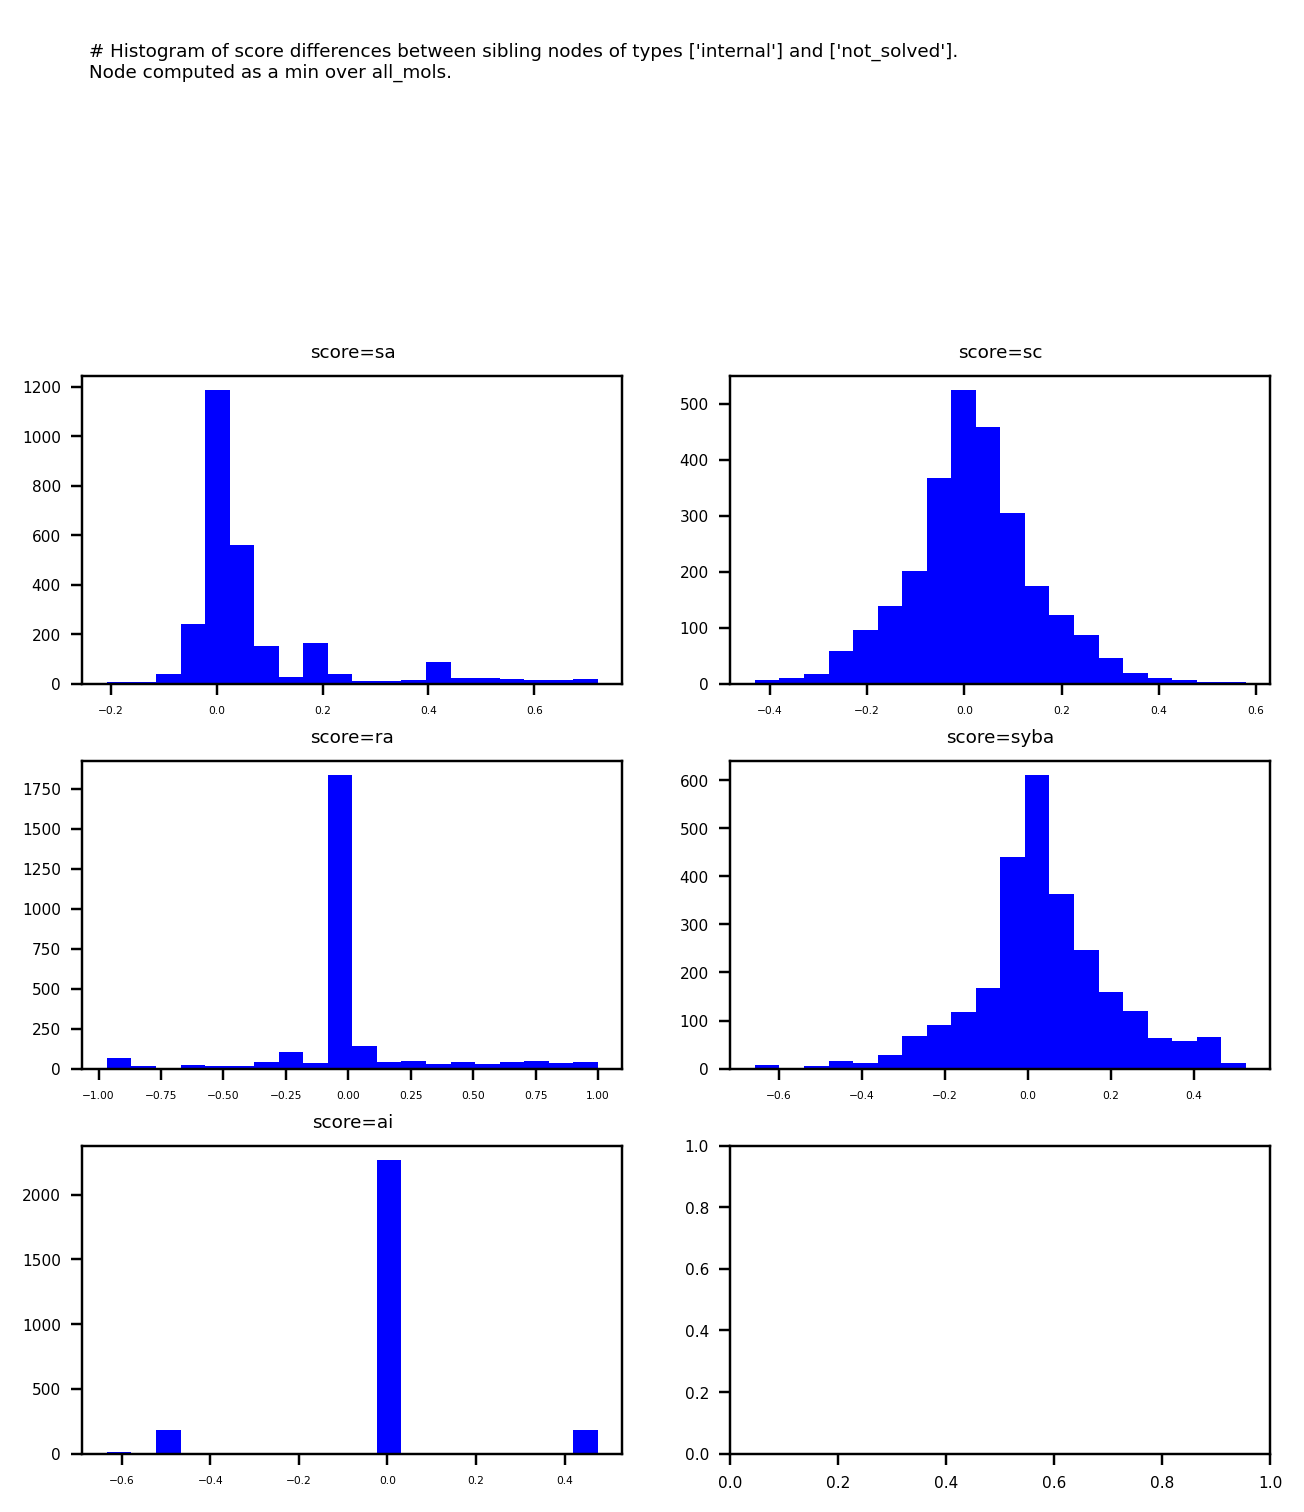

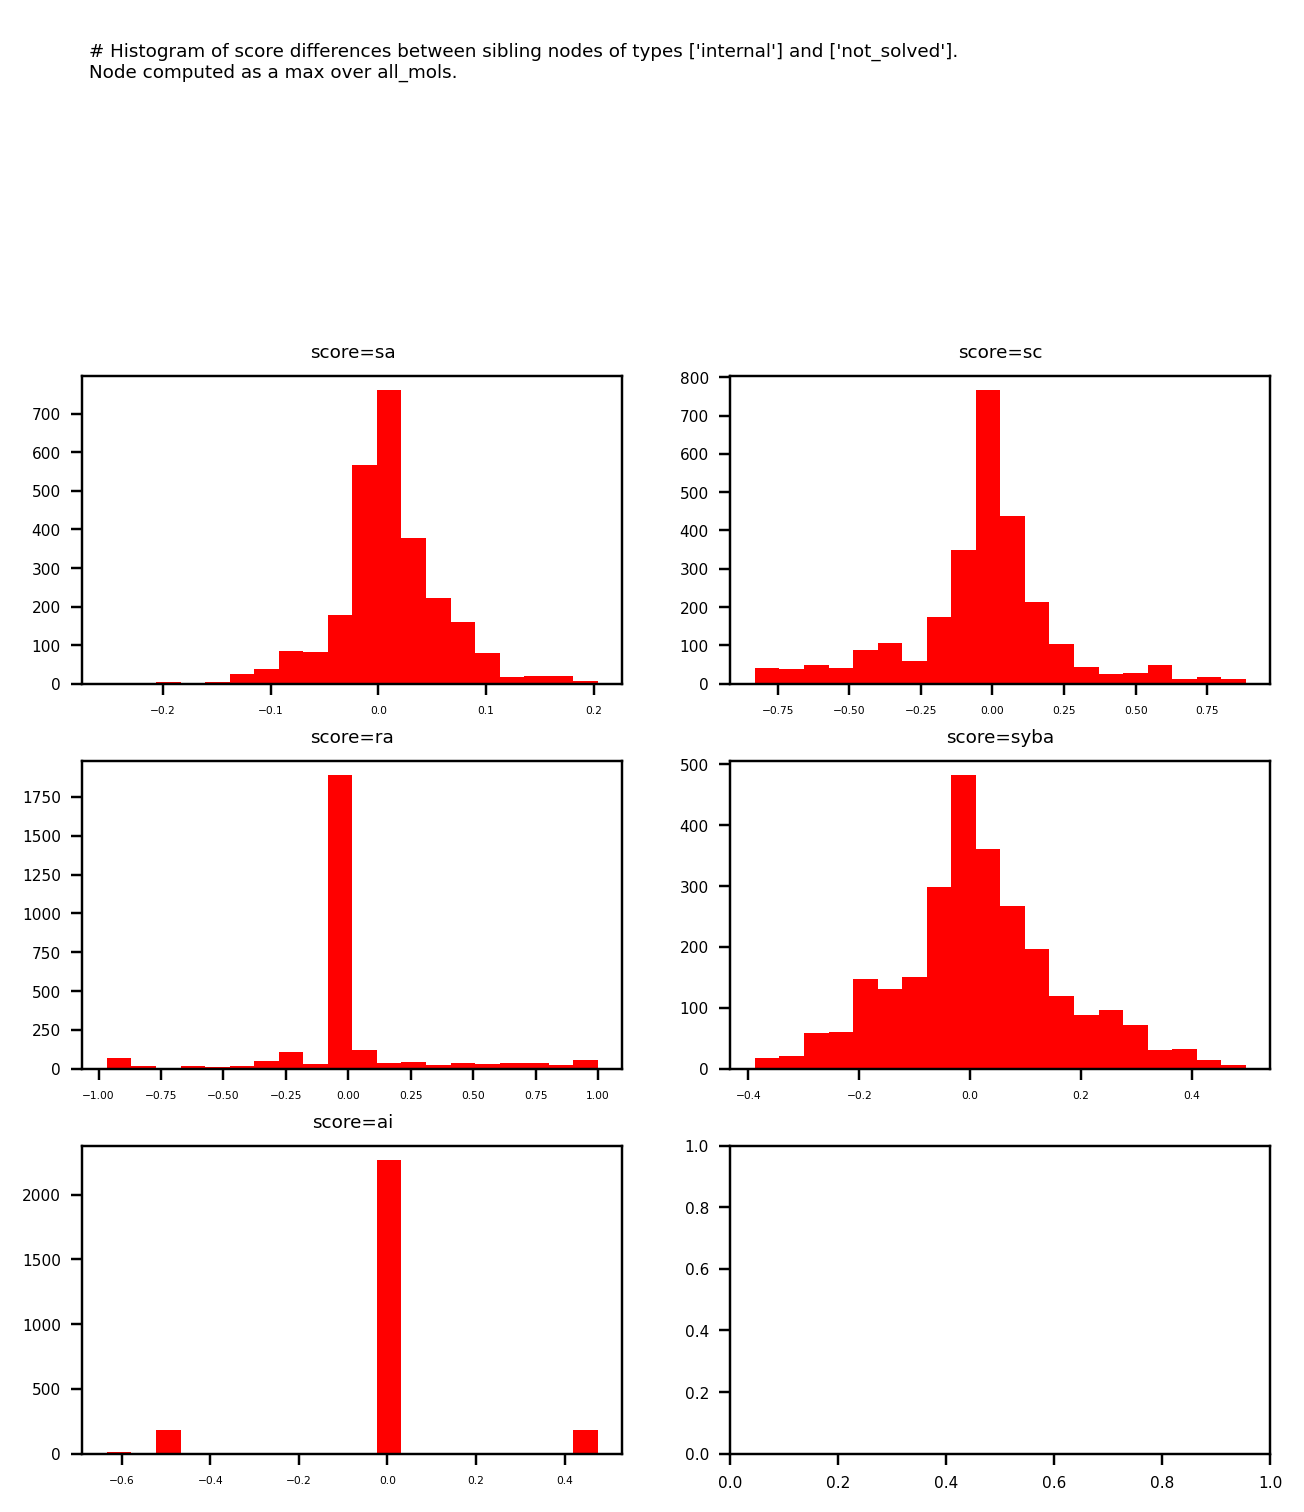

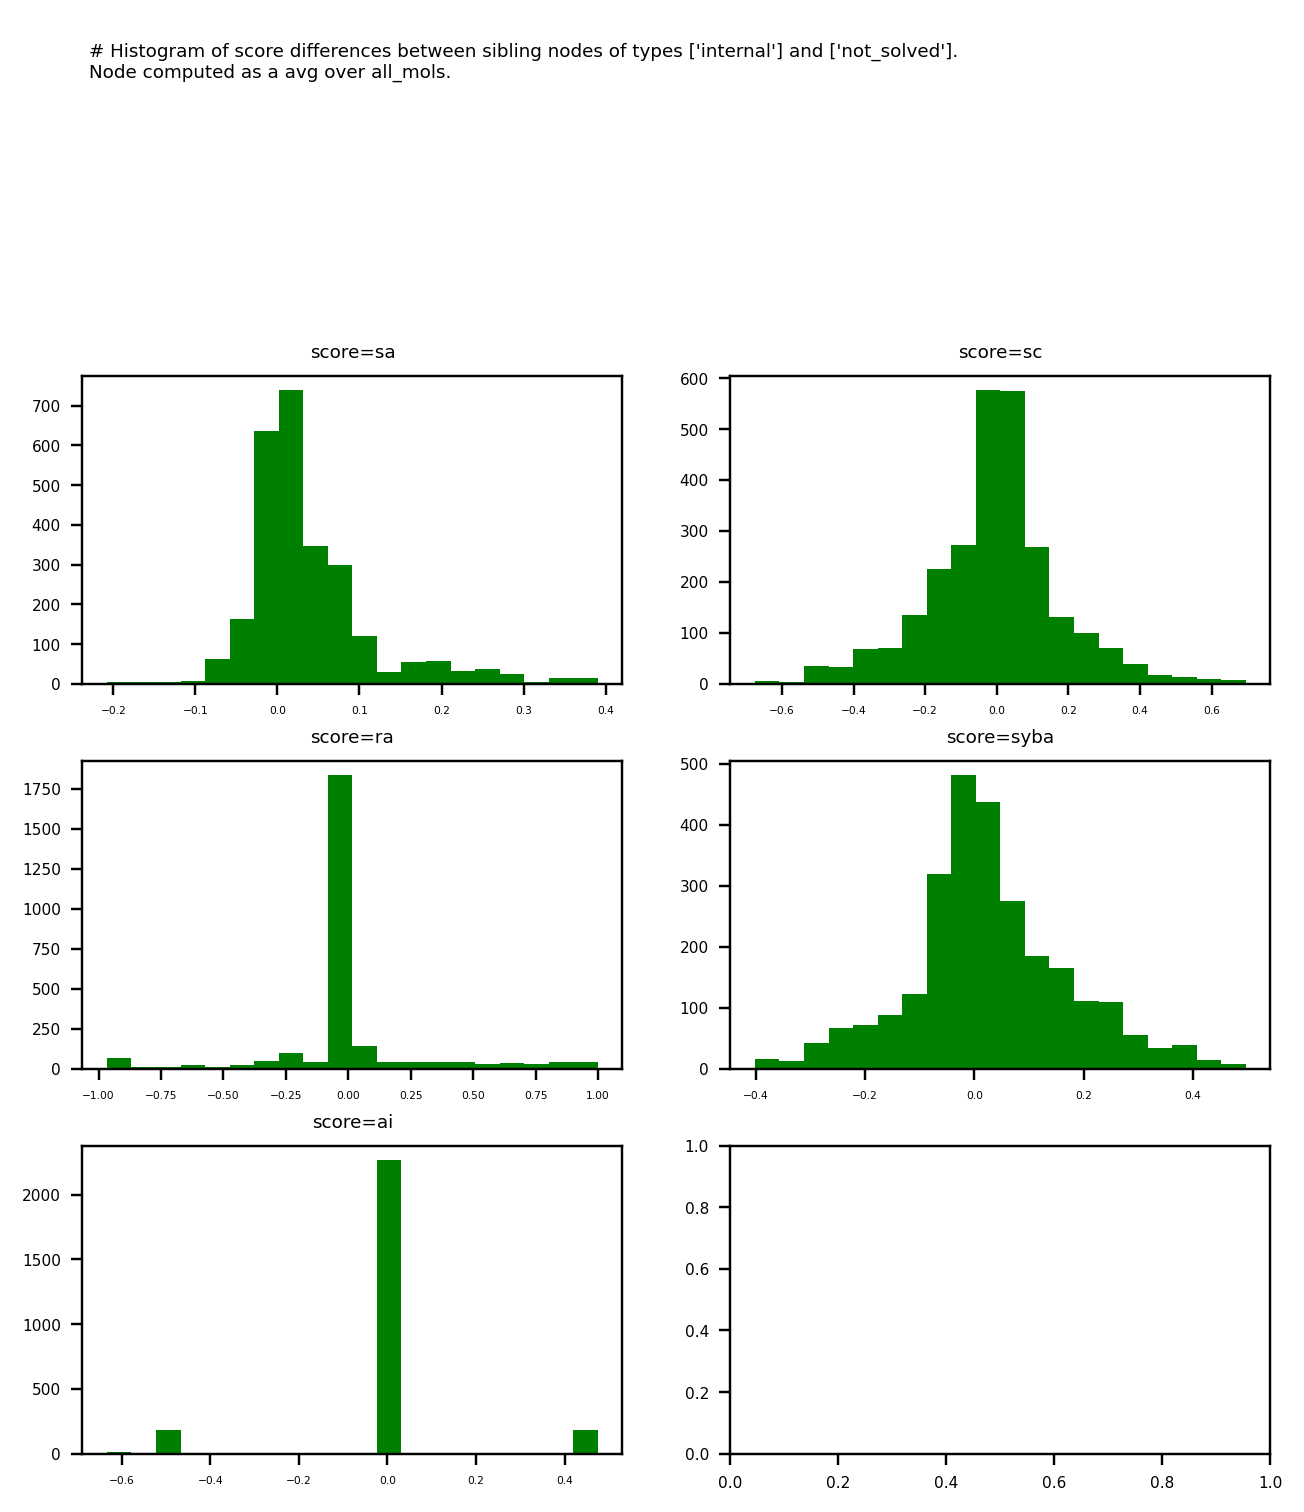

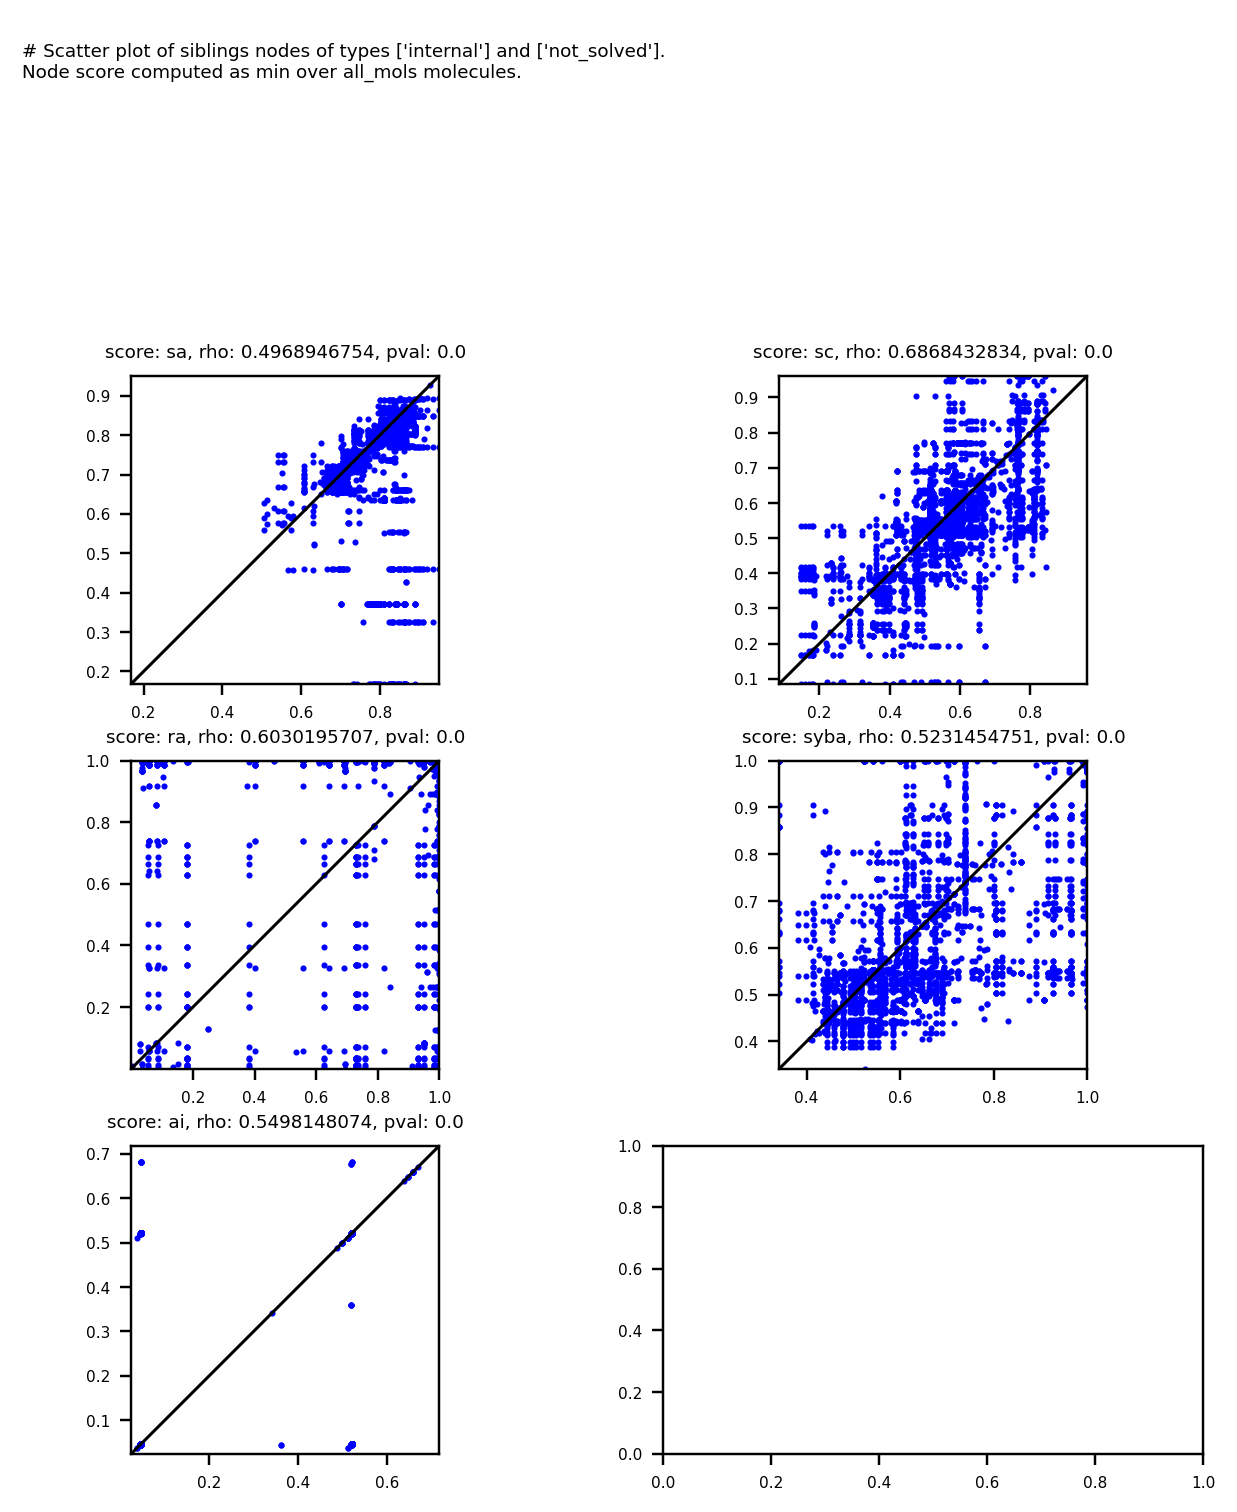

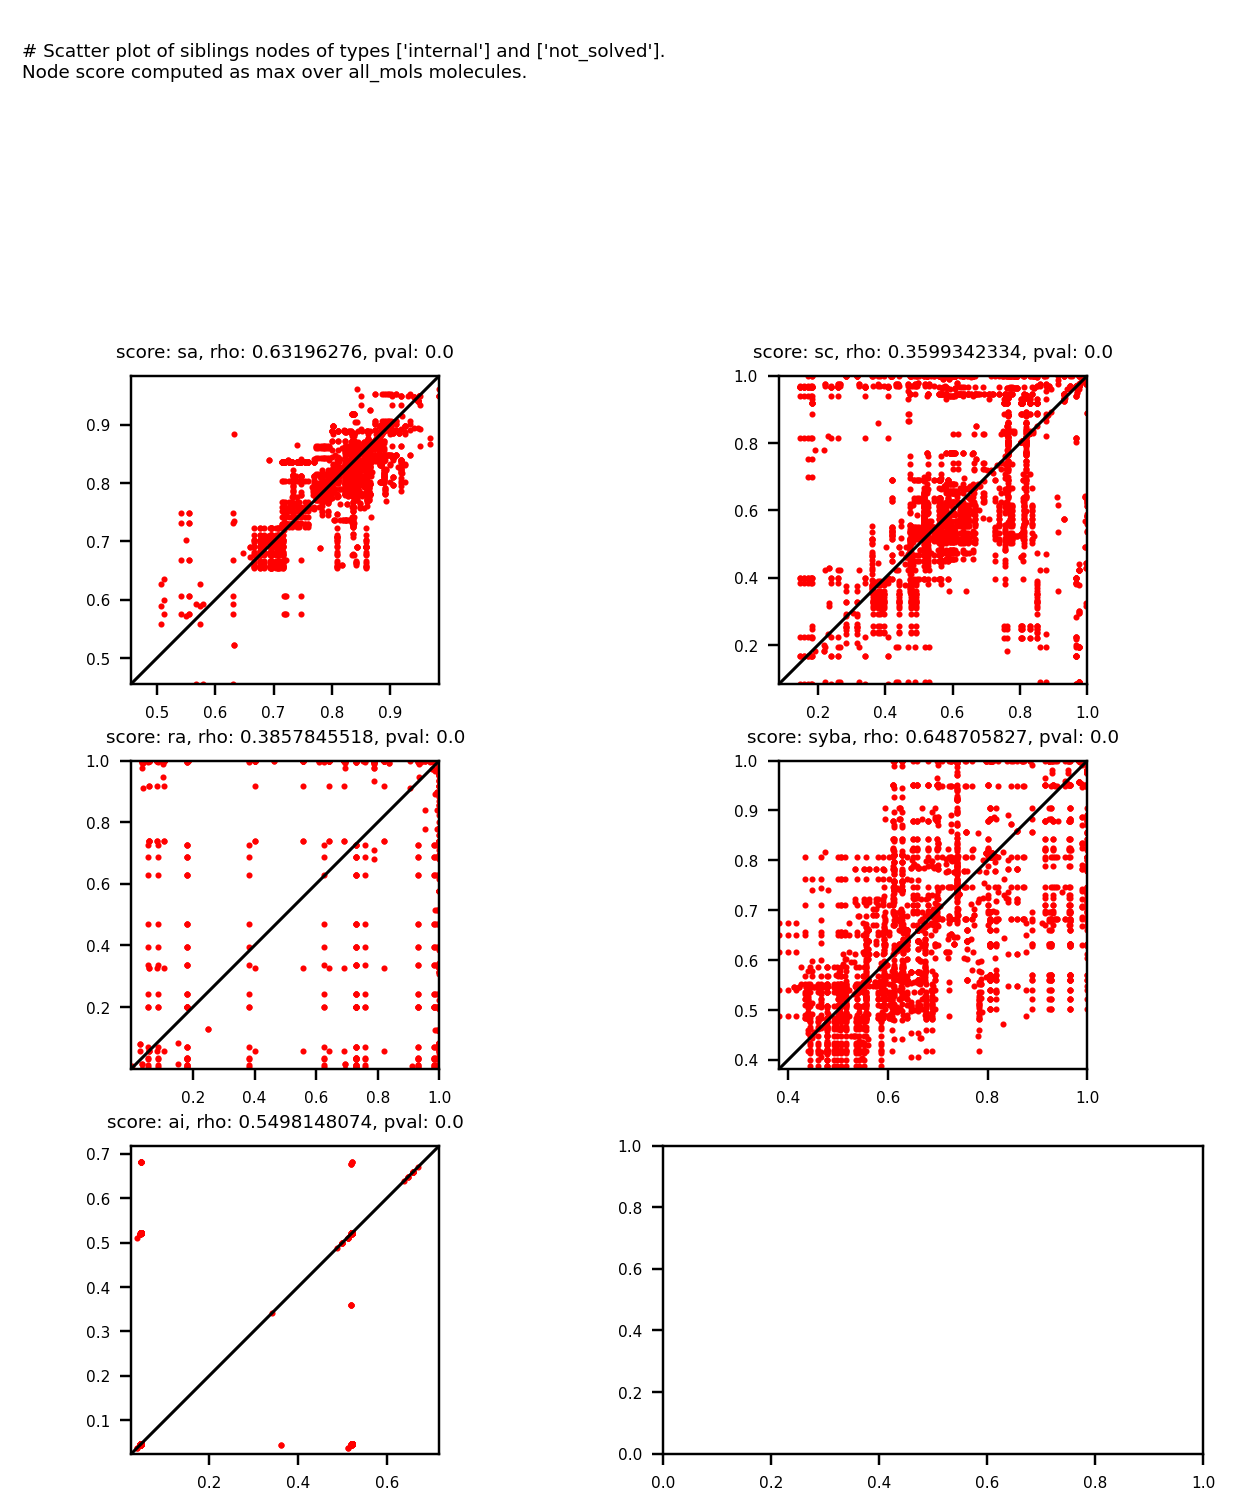

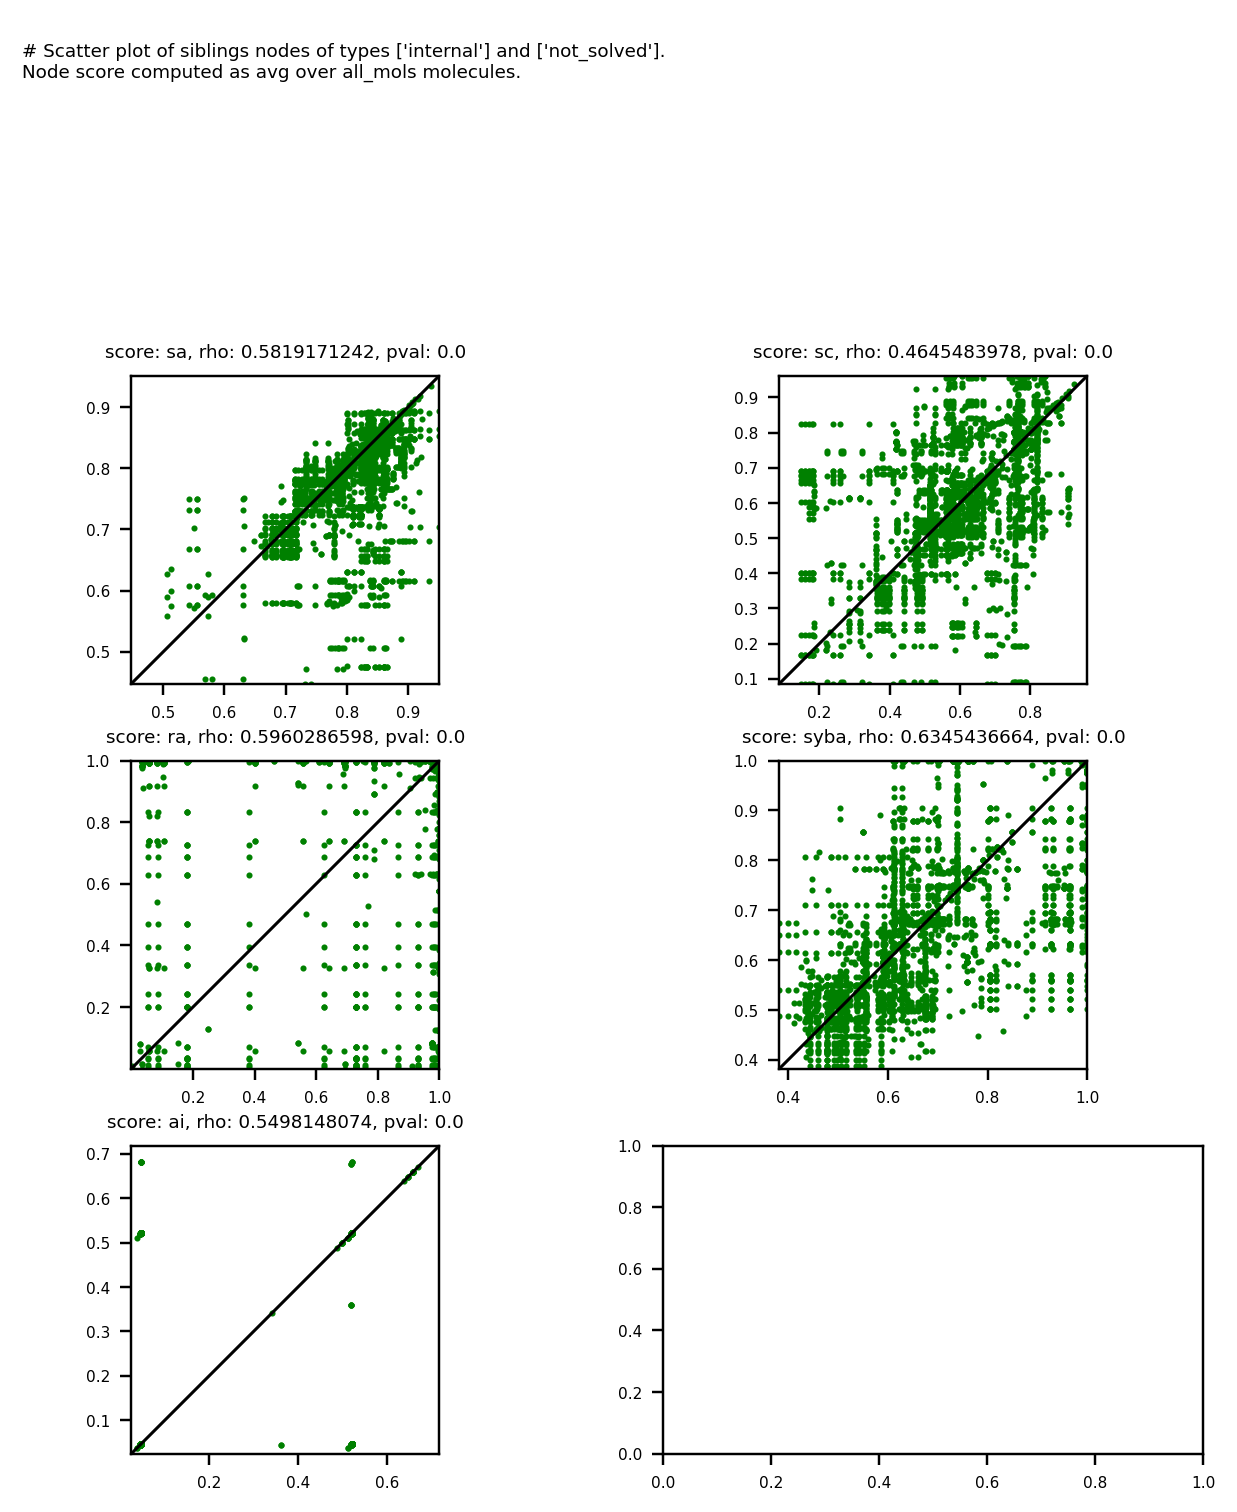

In [ ]:
for xtype, ytype, tree_to_scores in [
    f(["internal"], ["not_solved"], all_mols),
    f(["internal", "solved"], ["not_solved"], all_mols),
    f(["solved"], ["internal"], all_mols),
    f(["solved"], ["not_solved"], all_mols),
    f(["internal"], ["not_solved"], expandable_mols),
]:
    histogram_pairs_siblings(xtype, ytype, tree_to_scores, detailed)
    scatter_pairs(xtype, ytype, tree_to_scores, detailed)
#     boxplot_scores(xtype, ytype, tree_to_scores, detailed)

for parenttype, childtype, tree_to_scores in [
    f(["internal"], ["not_solved"], expandable_mols),
    f(["internal"], ["internal"], expandable_mols),
    f(["internal", "not_solved"], ["not_solved"], expandable_mols),
]:
    histogram_pairs_parent_child(parenttype, childtype, tree_to_scores, detailed)